[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alihaider-debug/SGD-in-ML/blob/main/21I-1522_A02.ipynb)

**ALI HAIDER**

**21I-1522**

**CS-A**

**Stochastic Gradient Descent (SGD)**

### Deriving the Gradient Update Rule for Simple Linear Regression Using MSE Loss

#### 1. Defining the Linear Regression Model
A simple linear regression model is given by:

\[
\hat{y} = w x + b
\]

where:
- \(\hat{y}\) is the predicted value,
- \(x\) is the input feature,
- \(w\) is the weight (coefficient),
- \(b\) is the bias (intercept).

#### 2. Defining the Loss Function
We use the Mean Squared Error (MSE) as the loss function:

\[
L = \frac{1}{N} \sum_{i=1}^{N} (y_i - (\hat{w} x_i + \hat{b}))^2
\]

where:
- \(N\) is the number of training samples,
- \(y_i\) is the actual output for the \(i\)th sample,
- \(\hat{y_i} = w x_i + b\) is the predicted output.

#### 3. Compute Partial Derivatives (Gradients)
To minimize the loss, we compute the partial derivatives of \(L\) with respect to \(w\) and \(b\).

Gradient with respect to \(w\):

\[
\frac{\partial L}{\partial w} = \frac{1}{N} \sum_{i=1}^{N} -2 x_i (y_i - (\hat{w} x_i + \hat{b}))
\]

Gradient with respect to \(b\):

\[
\frac{\partial L}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} -2 (y_i - (\hat{w} x_i + \hat{b}))
\]

#### 4. Gradient Descent Update Rule
Using gradient descent, we update \(w\) and \(b\) as follows:

\[
w := w - \alpha \frac{\partial L}{\partial w}
\]

\[
b := b - \alpha \frac{\partial L}{\partial b}
\]

where:
- \(\alpha\) is the learning rate, controlling step size in the optimization process.


**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


**Load the iris dataset**

In [5]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Add target column

# Display the first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**SGD for Linear Regression**

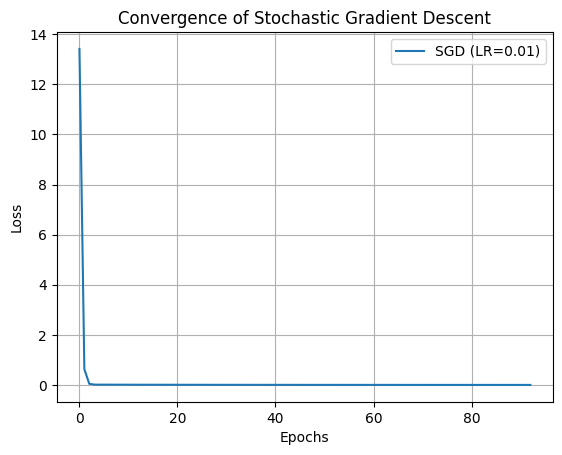

Final Model Parameters: w = 1.9872, b = 0.0465


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset (manually defined points)
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # y = 2x

# Stochastic Gradient Descent (SGD) for Linear Regression
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=100, momentum=0.0):
    np.random.seed(42)
    w, b = np.random.randn(), np.random.randn()
    v_w, v_b = 0, 0  # Initialize momentum terms
    n = len(X)
    loss_history = []

    for epoch in range(epochs):
        total_loss = 0

        # Shuffle the dataset to ensure randomness in stochastic updates
        indices = np.random.permutation(n)
        X, y = X[indices], y[indices]

        for i in range(n):
            x_i, y_i = X[i], y[i]

            # Prediction and error calculation
            y_pred = w * x_i + b
            error = y_pred - y_i

            # Compute gradients (derivatives)
            dw = 2 * x_i * error
            db = 2 * error

            # Apply momentum-based update
            v_w = momentum * v_w - learning_rate * dw
            v_b = momentum * v_b - learning_rate * db
            w += v_w
            b += v_b

            # Compute individual loss
            total_loss += error ** 2

        # Store average loss for visualization
        loss_history.append(total_loss / n)

        # Stop early if loss stabilizes (for efficiency)
        if epoch > 10 and abs(loss_history[-1] - loss_history[-2]) < 1e-6:
            break

    return w, b, loss_history

# Train the SGD model
learning_rate = 0.01
w_final, b_final, loss_history = stochastic_gradient_descent(X, y, learning_rate=learning_rate, epochs=100)

# Plot loss convergence
plt.plot(loss_history, label=f"SGD (LR={learning_rate})")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Convergence of Stochastic Gradient Descent")
plt.legend()
plt.grid()
plt.show()

# Print final parameters
print(f"Final Model Parameters: w = {w_final:.4f}, b = {b_final:.4f}")


**Train a Simple Linear Regression Model**

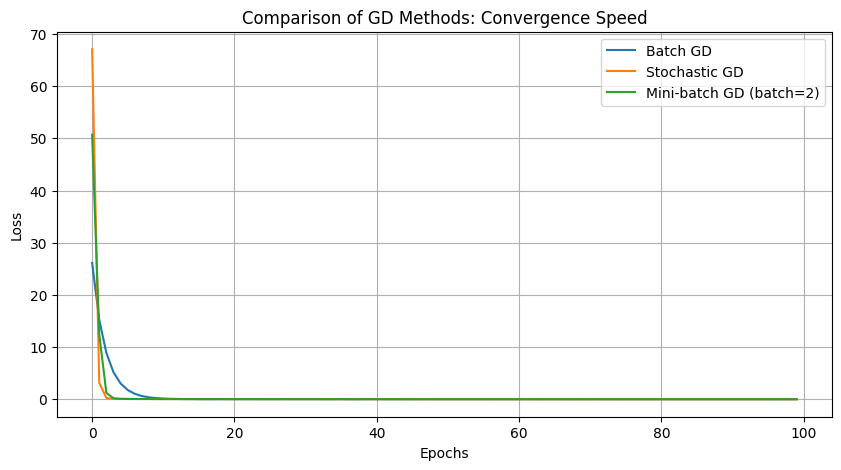

Batch GD:        w = 1.9490, b = 0.1841
Stochastic GD:   w = 1.9886, b = 0.0410
Mini-batch GD:   w = 1.9758, b = 0.0893


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # y = 2x

# Generalized Gradient Descent Function
def gradient_descent(X, y, learning_rate=0.01, epochs=100, batch_size=None):
    """
    Implements Batch, Mini-batch, and Stochastic Gradient Descent.

    Parameters:
        X (array): Input data
        y (array): Target labels
        learning_rate (float): Learning rate
        epochs (int): Number of iterations
        batch_size (int or None): If None -> Batch GD, 1 -> Stochastic GD, k -> Mini-batch GD

    Returns:
        w, b (float): Final parameters
        loss_history (list): Loss values per epoch
    """
    np.random.seed(42)
    w, b = np.random.randn(), np.random.randn()
    n = len(X)
    loss_history = []

    for epoch in range(epochs):
        # Shuffle dataset for randomness
        indices = np.random.permutation(n)
        X, y = X[indices], y[indices]

        # Define batch size
        if batch_size is None:
            batch_size = n  # Batch GD
        elif batch_size == 1:
            batch_size = 1   # Stochastic GD

        total_loss = 0

        for i in range(0, n, batch_size):
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            # Predictions
            y_pred = w * X_batch + b
            error = y_pred - y_batch

            # Compute gradients
            dw = 2 * np.mean(X_batch * error)
            db = 2 * np.mean(error)

            # Update parameters
            w -= learning_rate * dw
            b -= learning_rate * db

            # Compute loss
            total_loss += np.mean(error ** 2)

        # Store loss
        loss_history.append(total_loss)

        # Stop early if loss stabilizes
        if epoch > 10 and abs(loss_history[-1] - loss_history[-2]) < 1e-6:
            break

    return w, b, loss_history

# Training different GD variants
epochs = 100
learning_rate = 0.01

# Batch Gradient Descent
w_bgd, b_bgd, loss_bgd = gradient_descent(X, y, learning_rate, epochs, batch_size=None)

# Stochastic Gradient Descent
w_sgd, b_sgd, loss_sgd = gradient_descent(X, y, learning_rate, epochs, batch_size=1)

# Mini-batch Gradient Descent (batch_size = 2)
w_mbgd, b_mbgd, loss_mbgd = gradient_descent(X, y, learning_rate, epochs, batch_size=2)

# Plot convergence comparison
plt.figure(figsize=(10, 5))
plt.plot(loss_bgd, label="Batch GD")
plt.plot(loss_sgd, label="Stochastic GD")
plt.plot(loss_mbgd, label="Mini-batch GD (batch=2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of GD Methods: Convergence Speed")
plt.legend()
plt.grid()
plt.show()

# Print final results
print(f"Batch GD:        w = {w_bgd:.4f}, b = {b_bgd:.4f}")
print(f"Stochastic GD:   w = {w_sgd:.4f}, b = {b_sgd:.4f}")
print(f"Mini-batch GD:   w = {w_mbgd:.4f}, b = {b_mbgd:.4f}")


**Effect of Learning Rate on Convergence**

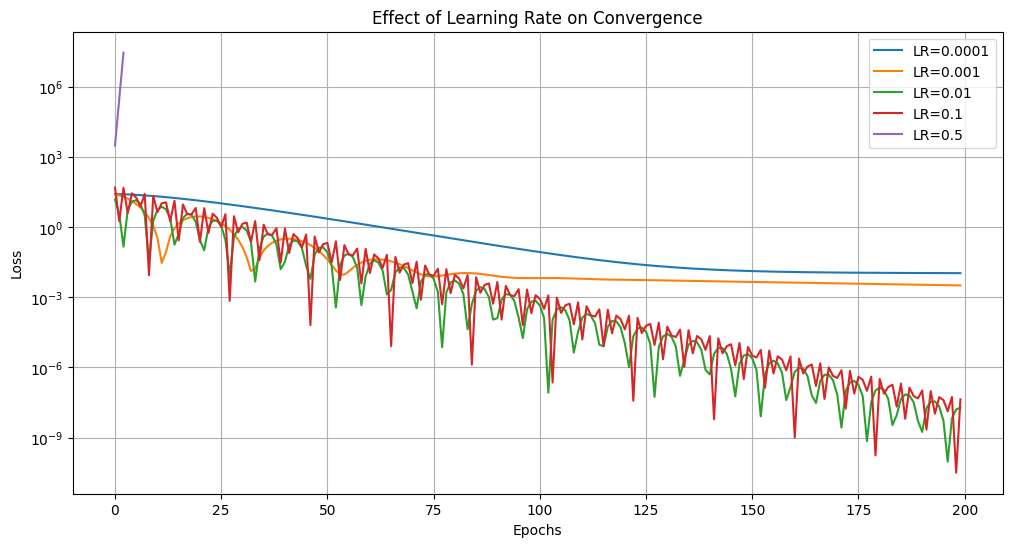

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # y = 2x

# Function to perform gradient descent for different learning rates
def gradient_descent_lr(X, y, learning_rate, epochs=100, momentum=0.9):
    np.random.seed(42)
    w, b = np.random.randn(), np.random.randn()
    v_w, v_b = 0, 0  # Initialize momentum terms
    n = len(X)
    loss_history = []

    for epoch in range(epochs):
        y_pred = w * X + b
        dw = -2 * np.sum(X * (y - y_pred)) / n
        db = -2 * np.sum(y - y_pred) / n

        # Update with momentum
        v_w = momentum * v_w - learning_rate * dw
        v_b = momentum * v_b - learning_rate * db
        w += v_w
        b += v_b

        # Compute loss
        loss = np.mean((y - (w * X + b))**2)
        loss_history.append(loss)

        # Stop early if loss becomes too large (diverging case)
        if loss > 1e6:
            break

    return loss_history

# Different learning rates to test
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]

plt.figure(figsize=(12, 6))

for lr in learning_rates:
    loss_history = gradient_descent_lr(X, y, learning_rate=lr, epochs=200)
    plt.plot(loss_history, label=f"LR={lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Effect of Learning Rate on Convergence")
plt.legend()
plt.grid()
plt.yscale("log")  # Log scale to handle divergence cases
plt.show()


Effect of Momentum on Convergence

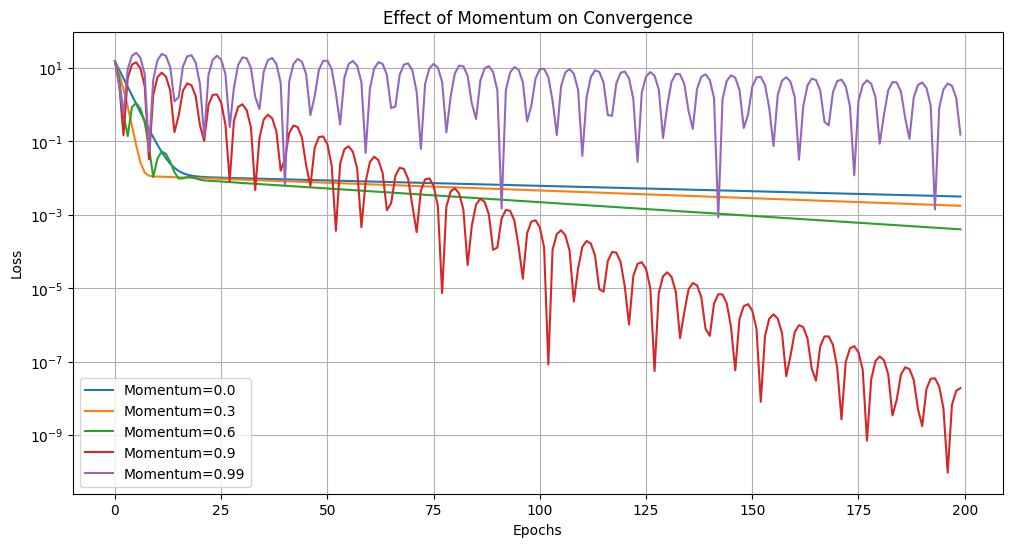

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # y = 2x

# Function to perform gradient descent with varying momentum
def gradient_descent_momentum(X, y, learning_rate=0.01, momentum=0.0, epochs=100):
    np.random.seed(42)
    w, b = np.random.randn(), np.random.randn()
    v_w, v_b = 0, 0  # Initialize momentum terms
    n = len(X)
    loss_history = []

    for epoch in range(epochs):
        y_pred = w * X + b
        dw = -2 * np.sum(X * (y - y_pred)) / n
        db = -2 * np.sum(y - y_pred) / n

        # Update with momentum
        v_w = momentum * v_w - learning_rate * dw
        v_b = momentum * v_b - learning_rate * db
        w += v_w
        b += v_b

        # Compute loss
        loss = np.mean((y - (w * X + b))**2)
        loss_history.append(loss)

        # Stop early if loss becomes too large (diverging case)
        if loss > 1e6:
            break

    return loss_history

# Different momentum values to test
momentum_values = [0.0, 0.3, 0.6, 0.9, 0.99]

plt.figure(figsize=(12, 6))

for momentum in momentum_values:
    loss_history = gradient_descent_momentum(X, y, learning_rate=0.01, momentum=momentum, epochs=200)
    plt.plot(loss_history, label=f"Momentum={momentum}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Effect of Momentum on Convergence")
plt.legend()
plt.grid()
plt.yscale("log")  # Log scale to visualize convergence behavior
plt.show()
